# Code 4
- Numerical EDA
  - Basic Transforrmation
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [1]:
#CodeSection1
from google.colab import drive
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [2]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [3]:
#CodeSection3
train = pd.read_csv('/mntDrive/MyDrive/__Data_Science/2 Cross Sell Prediction/input/train.csv')
test = pd.read_csv('/mntDrive/MyDrive/__Data_Science/2 Cross Sell Prediction/input/test.csv')

## 3/ Combine both Datasets (train, test)

In [4]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [5]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [6]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## 4/ EDA - Check Numerical Variables

In [7]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

In [8]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


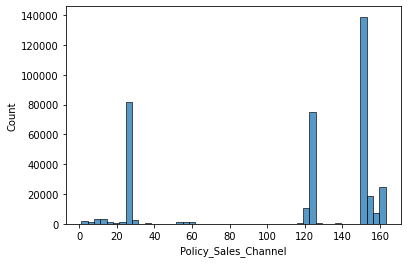

In [ ]:
#CodeSection8


In [ ]:
#Check other variables too and transform if needed

### Log Transformation
- Transform a Numerical Feature to Normal

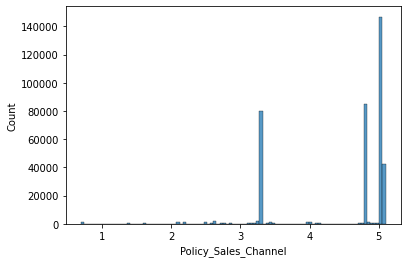

In [ ]:
#CodeSection9


### Now lets Tranform One Variable/Feature

In [9]:
#CodeSection10
# Write the Transformation Code
numerical = ['Age', 'Annual_Premium', 'Vintage']
for num_var in numerical:
  for dataset in all_data:
    dataset[num_var] = np.log(dataset[num_var]+1)
 # "1" is added to avoid error for rows that contain "0"

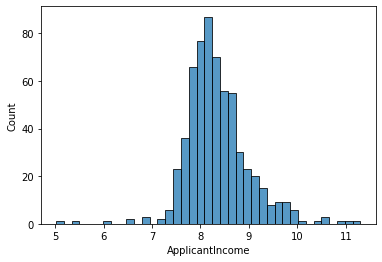

In [ ]:
#CodeSection11
# Lets check again
<Write your code here>
# Normal Distribution

### Replicate for other Numerical Variable/Features

In [10]:
#CodeSection12

# Identify all other Numerical Variables 
numerical_features = ['CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Write a loop to do the same - use num_var
<Write your code here>

SyntaxError: ignored

## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

## 7/ Now Re Check all Features

In [11]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

## 8/ Prepare Data for Model Model

In [12]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,3.806662,1,28.0,0,> 2 Years,Yes,10.607946,26.0,5.384495,1
1,2,Male,4.343805,1,3.0,0,1-2 Year,No,10.420405,26.0,5.214936,0
2,3,Male,3.871201,1,28.0,0,> 2 Years,Yes,10.553075,26.0,3.332205,1
3,4,Male,3.091042,1,11.0,1,< 1 Year,No,10.261861,152.0,5.318120,0
4,5,Female,3.401197,1,41.0,1,< 1 Year,No,10.221832,152.0,3.688879,0


In [13]:
#CodeSection16
# Check First 5 Rows of Test Data
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,3.258097,1,11.0,1,< 1 Year,No,10.485340,152.0,3.988984
1,381111,Male,3.713572,1,28.0,0,1-2 Year,Yes,10.427121,7.0,4.718499
2,381112,Male,3.871201,1,28.0,0,1-2 Year,Yes,10.597909,124.0,5.298317
3,381113,Male,3.218876,1,27.0,1,< 1 Year,Yes,10.528276,152.0,5.236442
4,381114,Male,3.332205,1,28.0,1,< 1 Year,No,10.986952,152.0,5.697093


In [14]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['Response','id'], axis =  1)
y = train['Response']

### Create Dummy Variables for  Categorical Variables

In [15]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [16]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000, class_weight = 'balanced')

In [17]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [18]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [19]:
#CodeSection22
# Import metrics library
from sklearn.metrics import accuracy_score

In [20]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = y

In [21]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 64.0%


## 10/ Predict and Submit

### Predict

In [22]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['id'], axis =  1)

In [23]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test)

In [ ]:
#CodeSection27
# use this code if the next Code shows error
#X_test['Married_Missing']  = 0

In [24]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [25]:
#CodeSection29
sample_submission = pd.read_csv('/mntDrive/MyDrive/__Data_Science/2 Cross Sell Prediction/input/sample_submission.csv')
sample_submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


### Create Submission File

In [26]:
#CodeSection30
submission = pd.DataFrame({
    'id' : test['id'],
    'Response' : X_test_prep
})

### Export Submission File

In [27]:
#CodeSection31
submission.to_csv('/mntDrive/MyDrive/__Data_Science/2 Cross Sell Prediction/output/O4_Transformation_Strategy_balanced.csv', index = False)

In [ ]:
# LB Accuracy : 0.7777